<a href="https://colab.research.google.com/github/yangsungsu/web1/blob/master/%EA%B3%B5%EC%82%AC%EB%B9%84_%EB%B6%84%EC%84%9D_V8(%EC%84%B1%EB%8A%A5_%EC%99%84%EB%A3%8C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import model_selection, svm, metrics

import numpy as np
import pandas as pd
%config InlineBackend.figure_format = 'retina'

In [6]:
import os, os.path, shutil
if not os.path.exists("./data"):
    os.makedirs("./data")

In [7]:
!pip install xlrd

In [8]:
contract_data = pd.read_excel('data/contract.xlsx')

In [9]:
print(contract_data.shape)

(51736, 16)


In [10]:
print(contract_data.공사비구분.value_counts())

1  표준시설부담금      25844
3  설계조정시설부담금    14174
2  설계시설부담금      11718
Name: 공사비구분, dtype: int64


In [74]:
cd = contract_data

cd = cd.set_index('공사비구분')

In [76]:
features1 = ["접수종류", "공사형태", "고객부담금", "계약종별", "공급방식",
                 "계약전력", "저고압구분", "계약방법", "공동이용구분", "자가용구분",
            "선택요금코드", "가공지중구분", 
                 "공정유형코드", "전기사용용도코드", "시간적용제외코드"]

In [77]:
x = cd[features1]


In [79]:
x

,접수종류,공사형태,고객부담금,계약종별,공급방식,계약전력,저고압구분,계약방법,공동이용구분,자가용구분,선택요금코드,가공지중구분,공정유형코드,전기사용용도코드,시간적용제외코드
0,22-공급방식변경증설,1 외선불요,172000,211 일반용(갑)저압,738 삼상4선(220/380V),10,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,01 인입선공사,02 상업용,1 450시간 적용
1,21-증설,2 외선소요,4900000,211 일반용(갑)저압,738 삼상4선(220/380V),145,1 저압,0 저압일반계약,5 공동이용아님,1 자가용,0 대상아님,지중,02 가공외선공사,02 상업용,1 450시간 적용
2,11-신설(상용/임시),1 외선불요,1854000,610 가로등(을),738 삼상4선(220/380V),24,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,02 가공외선공사,08 가로등,5 저압 계약전력초과 적용
3,23-계약종별변경증설,1 외선불요,258000,211 일반용(갑)저압,322 단상2선(220V),8,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,01 인입선공사,02 상업용,1 450시간 적용
4,22-공급방식변경증설,1 외선불요,430000,211 일반용(갑)저압,738 삼상4선(220/380V),15,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,01 인입선공사,02 상업용,1 450시간 적용
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51731,29-공급지점변경,2 외선소요,845893,223 교육용(갑)고압A,840 삼상4선(22.9kV-y),600,2 고압,2 고압수전설비계약,5 공동이용아님,1 자가용,2 선택요금2,지중,02 가공외선공사,10 기타공공용,6 고압 계약전력초과 적용
51732,23-계약종별변경증설,1 외선불요,1083899,211 일반용(갑)저압,738 삼상4선(220/380V),18,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,02 가공외선공사,02 상업용,1 450시간 적용
51733,29-공급지점변경,1 외선불요,3356444,726 산업용(을)고압A,840 삼상4선(22.9kV-y),950,2 고압,2 고압수전설비계약,5 공동이용아님,1 자가용,2 선택요금2,가공,02 가공외선공사,02 상업용,6 고압 계약전력초과 적용
51734,21-증설,1 외선불요,478000,211 일반용(갑)저압,738 삼상4선(220/380V),8,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,02 가공외선공사,02 상업용,1 450시간 적용


In [15]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51736 entries, 0 to 51735
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   접수종류      51736 non-null  object
 1   공사형태      51736 non-null  object
 2   고객부담금     51736 non-null  int64 
 3   계약종별      51736 non-null  object
 4   공급방식      51736 non-null  object
 5   계약전력      51736 non-null  int64 
 6   저고압구분     51736 non-null  object
 7   계약방법      51736 non-null  object
 8   공동이용구분    51736 non-null  object
 9   자가용구분     51736 non-null  object
 10  선택요금코드    51736 non-null  object
 11  가공지중구분    47416 non-null  object
 12  공정유형코드    43869 non-null  object
 13  전기사용용도코드  51736 non-null  object
 14  시간적용제외코드  51736 non-null  object
dtypes: int64(2), object(13)
memory usage: 5.9+ MB


contract = contract_data.set_index('공사비구분')

In [81]:
y = cd["공사비구분"]
print(y.shape)
y.head()

(51736,)


0    1  표준시설부담금
1    1  표준시설부담금
2    1  표준시설부담금
3    1  표준시설부담금
4    1  표준시설부담금
Name: 공사비구분, dtype: object

In [82]:
y = pd.DataFrame(y)

In [83]:
y

,공사비구분
0,1 표준시설부담금
1,1 표준시설부담금
2,1 표준시설부담금
3,1 표준시설부담금
4,1 표준시설부담금
...,...
51731,3 설계조정시설부담금
51732,3 설계조정시설부담금
51733,3 설계조정시설부담금
51734,3 설계조정시설부담금


** X 데이터 전처리 - 문자 숫자 변경**

In [85]:
x_add = pd.get_dummies(x[features1])

In [86]:
new_x = pd.concat([x, x_add], axis=1); new_x.head()

,접수종류,공사형태,고객부담금,계약종별,공급방식,계약전력,저고압구분,계약방법,공동이용구분,자가용구분,선택요금코드,가공지중구분,공정유형코드,전기사용용도코드,시간적용제외코드,고객부담금,계약전력,접수종류_11-신설(상용/임시),"접수종류_14-신,증설(예비전력)",접수종류_18-해지후재사용(신규),접수종류_1C-신설(발전기),접수종류_1D-증설(발전기),접수종류_21-증설,접수종류_22-공급방식변경증설,접수종류_23-계약종별변경증설,접수종류_24-일부해지(신규),접수종류_25-계약단위분할,접수종류_26-계약단위합병,접수종류_28-단순공급방식변경,접수종류_29-공급지점변경,공사형태_0,공사형태_1 외선불요,공사형태_2 외선소요,공사형태_3 외선소요(선공급),계약종별_100 주택용전력,계약종별_108 임시전력(갑),계약종별_211 일반용(갑)저압,계약종별_213 교육용(갑)저압,계약종별_218 임시전력(을)저압,계약종별_221 일반용(갑)I고압A,...,공동이용구분_1 모수용,공동이용구분_2 자수용,공동이용구분_4 모자대상제외,공동이용구분_5 공동이용아님,자가용구분_1 자가용,자가용구분_2 비자가용,선택요금코드_0 대상아님,선택요금코드_1 선택요금1,선택요금코드_2 선택요금2,선택요금코드_3 선택요금3,선택요금코드_4 선택요금4,가공지중구분_가공,가공지중구분_지중,가공지중구분_혼재,공정유형코드_01 인입선공사,공정유형코드_02 가공외선공사,전기사용용도코드_01 주거용,전기사용용도코드_02 상업용,전기사용용도코드_03 관공용,전기사용용도코드_04 농사용,전기사용용도코드_05 국군용,전기사용용도코드_06 유엔군용,전기사용용도코드_07 아파트용,전기사용용도코드_08 가로등,전기사용용도코드_09 광공업용,전기사용용도코드_10 기타공공용,전기사용용도코드_11 사업자용(사무실),전기사용용도코드_12 사업자용(건설용),전기사용용도코드_13 사업자용(기타),전기사용용도코드_14 사업자용(변전소용),전기사용용도코드_15 사업자용(발전소기동전력),전기사용용도코드_17 종합계약아파트,전기사용용도코드_18 소형열병합,전기사용용도코드_20 연립주택,전기사용용도코드_21 융설용,시간적용제외코드_0 제외대상,시간적용제외코드_1 450시간 적용,시간적용제외코드_2 720시간 적용,시간적용제외코드_5 저압 계약전력초과 적용,시간적용제외코드_6 고압 계약전력초과 적용
0,22-공급방식변경증설,1 외선불요,172000,211 일반용(갑)저압,738 삼상4선(220/380V),10,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,01 인입선공사,02 상업용,1 450시간 적용,172000,10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,21-증설,2 외선소요,4900000,211 일반용(갑)저압,738 삼상4선(220/380V),145,1 저압,0 저압일반계약,5 공동이용아님,1 자가용,0 대상아님,지중,02 가공외선공사,02 상업용,1 450시간 적용,4900000,145,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,11-신설(상용/임시),1 외선불요,1854000,610 가로등(을),738 삼상4선(220/380V),24,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,02 가공외선공사,08 가로등,5 저압 계약전력초과 적용,1854000,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,23-계약종별변경증설,1 외선불요,258000,211 일반용(갑)저압,322 단상2선(220V),8,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,01 인입선공사,02 상업용,1 450시간 적용,258000,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,22-공급방식변경증설,1 외선불요,430000,211 일반용(갑)저압,738 삼상4선(220/380V),15,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,01 인입선공사,02 상업용,1 450시간 적용,430000,15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [87]:
new_x.drop(x[features1], axis=1, inplace=True)

In [88]:
new_x

,접수종류_11-신설(상용/임시),"접수종류_14-신,증설(예비전력)",접수종류_18-해지후재사용(신규),접수종류_1C-신설(발전기),접수종류_1D-증설(발전기),접수종류_21-증설,접수종류_22-공급방식변경증설,접수종류_23-계약종별변경증설,접수종류_24-일부해지(신규),접수종류_25-계약단위분할,접수종류_26-계약단위합병,접수종류_28-단순공급방식변경,접수종류_29-공급지점변경,공사형태_0,공사형태_1 외선불요,공사형태_2 외선소요,공사형태_3 외선소요(선공급),계약종별_100 주택용전력,계약종별_108 임시전력(갑),계약종별_211 일반용(갑)저압,계약종별_213 교육용(갑)저압,계약종별_218 임시전력(을)저압,계약종별_221 일반용(갑)I고압A,계약종별_222 일반용(갑)II고압A,계약종별_223 교육용(갑)고압A,계약종별_226 일반용(을)고압A,계약종별_228 임시전력(을)고압A,계약종별_311 산업용(갑)저압,계약종별_321 산업용(갑)I고압A,계약종별_322 산업용(갑)II고압A,계약종별_410 농사용(갑),계약종별_430 농사용(을)저압,계약종별_431 농사용(을)고압A,계약종별_526 교육용(을)고압A,계약종별_600 가로등(갑),계약종별_610 가로등(을),계약종별_726 산업용(을)고압A,계약종별_736 산업용(을)고압B,계약종별_905 심야전력(갑),공급방식_320 단상2선(200V),...,공동이용구분_1 모수용,공동이용구분_2 자수용,공동이용구분_4 모자대상제외,공동이용구분_5 공동이용아님,자가용구분_1 자가용,자가용구분_2 비자가용,선택요금코드_0 대상아님,선택요금코드_1 선택요금1,선택요금코드_2 선택요금2,선택요금코드_3 선택요금3,선택요금코드_4 선택요금4,가공지중구분_가공,가공지중구분_지중,가공지중구분_혼재,공정유형코드_01 인입선공사,공정유형코드_02 가공외선공사,전기사용용도코드_01 주거용,전기사용용도코드_02 상업용,전기사용용도코드_03 관공용,전기사용용도코드_04 농사용,전기사용용도코드_05 국군용,전기사용용도코드_06 유엔군용,전기사용용도코드_07 아파트용,전기사용용도코드_08 가로등,전기사용용도코드_09 광공업용,전기사용용도코드_10 기타공공용,전기사용용도코드_11 사업자용(사무실),전기사용용도코드_12 사업자용(건설용),전기사용용도코드_13 사업자용(기타),전기사용용도코드_14 사업자용(변전소용),전기사용용도코드_15 사업자용(발전소기동전력),전기사용용도코드_17 종합계약아파트,전기사용용도코드_18 소형열병합,전기사용용도코드_20 연립주택,전기사용용도코드_21 융설용,시간적용제외코드_0 제외대상,시간적용제외코드_1 450시간 적용,시간적용제외코드_2 720시간 적용,시간적용제외코드_5 저압 계약전력초과 적용,시간적용제외코드_6 고압 계약전력초과 적용
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51731,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
51732,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
51733,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
51734,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


데이터 전처리 - 카테고리를 숫자로 변환 (열의 유향을 먼저 변경)
계열을 정수 식별자로 변환하기를 원하면 pd.factorize를 사용 가능 

In [89]:
y = y.replace({'공사비구분': '1표준시설부담금, 2설계시설부담금, 3설계조정시설부담금'}, {'공사비구분': '0,1,2'})

In [90]:
y.공사비구분 = pd.Categorical(y.공사비구분)

In [91]:
y['공사비구분_code'] = y.공사비구분.cat.codes

In [92]:
y

,공사비구분,공사비구분_code
0,1 표준시설부담금,0
1,1 표준시설부담금,0
2,1 표준시설부담금,0
3,1 표준시설부담금,0
4,1 표준시설부담금,0
...,...,...
51731,3 설계조정시설부담금,2
51732,3 설계조정시설부담금,2
51733,3 설계조정시설부담금,2
51734,3 설계조정시설부담금,2


In [93]:
y.drop(['공사비구분'], axis='columns', inplace=True)

In [94]:
y

,공사비구분_code
0,0
1,0
2,0
3,0
4,0
...,...
51731,2
51732,2
51733,2
51734,2


In [29]:
print(y.공사비구분_code.value_counts())

0    25844
2    14174
1    11718
Name: 공사비구분_code, dtype: int64


In [ ]:
#공사비구분 = pd.get_dummies(y, prefix='공사비구분_')

In [ ]:
#new_y = pd.concat([y, 공사비구분], axis=1); new_y.head()

In [ ]:
#y = new_y

In [ ]:
#y = new_y.drop('공사비구분', axis=1, inplace=True)

new_x.drop('접수종류', '공사형태', '계약종별', '공급방식', '저고압구분', '계약방법', '공동이용구분', '자가용구분', '선택요금코드', '가공지중구분', '공정유형코드', '전기사용용도코드', '시간적용제외코드', axis=1, inplace=True)

x, y의 컬럼 합친 후 특성 타켓 구분 후 결정트리 만들기

결정트리 분류

In [30]:
cd = pd.concat([new_x, y], axis=1); cd

,접수종류_11-신설(상용/임시),"접수종류_14-신,증설(예비전력)",접수종류_18-해지후재사용(신규),접수종류_1C-신설(발전기),접수종류_1D-증설(발전기),접수종류_21-증설,접수종류_22-공급방식변경증설,접수종류_23-계약종별변경증설,접수종류_24-일부해지(신규),접수종류_25-계약단위분할,접수종류_26-계약단위합병,접수종류_28-단순공급방식변경,접수종류_29-공급지점변경,공사형태_0,공사형태_1 외선불요,공사형태_2 외선소요,공사형태_3 외선소요(선공급),계약종별_100 주택용전력,계약종별_108 임시전력(갑),계약종별_211 일반용(갑)저압,계약종별_213 교육용(갑)저압,계약종별_218 임시전력(을)저압,계약종별_221 일반용(갑)I고압A,계약종별_222 일반용(갑)II고압A,계약종별_223 교육용(갑)고압A,계약종별_226 일반용(을)고압A,계약종별_228 임시전력(을)고압A,계약종별_311 산업용(갑)저압,계약종별_321 산업용(갑)I고압A,계약종별_322 산업용(갑)II고압A,계약종별_410 농사용(갑),계약종별_430 농사용(을)저압,계약종별_431 농사용(을)고압A,계약종별_526 교육용(을)고압A,계약종별_600 가로등(갑),계약종별_610 가로등(을),계약종별_726 산업용(을)고압A,계약종별_736 산업용(을)고압B,계약종별_905 심야전력(갑),공급방식_320 단상2선(200V),...,공동이용구분_2 자수용,공동이용구분_4 모자대상제외,공동이용구분_5 공동이용아님,자가용구분_1 자가용,자가용구분_2 비자가용,선택요금코드_0 대상아님,선택요금코드_1 선택요금1,선택요금코드_2 선택요금2,선택요금코드_3 선택요금3,선택요금코드_4 선택요금4,가공지중구분_가공,가공지중구분_지중,가공지중구분_혼재,공정유형코드_01 인입선공사,공정유형코드_02 가공외선공사,전기사용용도코드_01 주거용,전기사용용도코드_02 상업용,전기사용용도코드_03 관공용,전기사용용도코드_04 농사용,전기사용용도코드_05 국군용,전기사용용도코드_06 유엔군용,전기사용용도코드_07 아파트용,전기사용용도코드_08 가로등,전기사용용도코드_09 광공업용,전기사용용도코드_10 기타공공용,전기사용용도코드_11 사업자용(사무실),전기사용용도코드_12 사업자용(건설용),전기사용용도코드_13 사업자용(기타),전기사용용도코드_14 사업자용(변전소용),전기사용용도코드_15 사업자용(발전소기동전력),전기사용용도코드_17 종합계약아파트,전기사용용도코드_18 소형열병합,전기사용용도코드_20 연립주택,전기사용용도코드_21 융설용,시간적용제외코드_0 제외대상,시간적용제외코드_1 450시간 적용,시간적용제외코드_2 720시간 적용,시간적용제외코드_5 저압 계약전력초과 적용,시간적용제외코드_6 고압 계약전력초과 적용,공사비구분_code
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51731,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
51732,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2
51733,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
51734,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2


In [31]:
feature_names = cd.columns.tolist()

In [32]:
feature_names = feature_names[0:101]

In [33]:
feature_names

['접수종류_11-신설(상용/임시)',
 '접수종류_14-신,증설(예비전력)',
 '접수종류_18-해지후재사용(신규)',
 '접수종류_1C-신설(발전기)',
 '접수종류_1D-증설(발전기)',
 '접수종류_21-증설',
 '접수종류_22-공급방식변경증설',
 '접수종류_23-계약종별변경증설',
 '접수종류_24-일부해지(신규)',
 '접수종류_25-계약단위분할',
 '접수종류_26-계약단위합병',
 '접수종류_28-단순공급방식변경',
 '접수종류_29-공급지점변경',
 '공사형태_0',
 '공사형태_1 외선불요',
 '공사형태_2 외선소요',
 '공사형태_3 외선소요(선공급)',
 '계약종별_100 주택용전력',
 '계약종별_108 임시전력(갑)',
 '계약종별_211 일반용(갑)저압',
 '계약종별_213 교육용(갑)저압',
 '계약종별_218 임시전력(을)저압',
 '계약종별_221 일반용(갑)I고압A',
 '계약종별_222 일반용(갑)II고압A',
 '계약종별_223 교육용(갑)고압A',
 '계약종별_226 일반용(을)고압A',
 '계약종별_228 임시전력(을)고압A',
 '계약종별_311 산업용(갑)저압',
 '계약종별_321 산업용(갑)I고압A',
 '계약종별_322 산업용(갑)II고압A',
 '계약종별_410 농사용(갑)',
 '계약종별_430 농사용(을)저압',
 '계약종별_431 농사용(을)고압A',
 '계약종별_526 교육용(을)고압A',
 '계약종별_600 가로등(갑)',
 '계약종별_610 가로등(을)',
 '계약종별_726 산업용(을)고압A',
 '계약종별_736 산업용(을)고압B',
 '계약종별_905 심야전력(갑)',
 '공급방식_320 단상2선(200V)',
 '공급방식_322 단상2선(220V)',
 '공급방식_638 삼상3선(380V)',
 '공급방식_738 삼상4선(220/380V)',
 '공급방식_790 삼상3선(6.6kV)',
 '공급방식_840 삼상4선(22.9kV-y)',
 '공급방식_850 삼상3선(22kV)',
 '공

In [34]:
target_name = np.array(['standard', 'design', 'revison'])

In [95]:
X_train, X_test, y_train, y_test = train_test_split(new_x, y, test_size = 0.2)

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
model = DecisionTreeClassifier(max_depth=20)

In [38]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.87620796289138

In [39]:
!pip install graphviz

In [41]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(
    model,
    out_file = "./contract.dot",
    feature_names = new_x.columns,
    class_names = target_name,
    filled = True
    )

In [42]:
with open("contract.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [43]:
list(zip(x.columns, model.feature_importances_.round(3)))

[('접수종류', 0.051),
 ('공사형태', 0.006),
 ('고객부담금', 0.01),
 ('계약종별', 0.048),
 ('공급방식', 0.0),
 ('계약전력', 0.005),
 ('저고압구분', 0.002),
 ('계약방법', 0.002),
 ('공동이용구분', 0.0),
 ('자가용구분', 0.0),
 ('선택요금코드', 0.0),
 ('가공지중구분', 0.001),
 ('공정유형코드', 0.007),
 ('전기사용용도코드', 0.101),
 ('시간적용제외코드', 0.002)]

In [45]:
cd_importance = pd.DataFrame({'feature':new_x.columns,'importance':model.feature_importances_ })

In [46]:
cd_importance

,feature,importance
0,접수종류_11-신설(상용/임시),0.051103
1,"접수종류_14-신,증설(예비전력)",0.006172
2,접수종류_18-해지후재사용(신규),0.009606
3,접수종류_1C-신설(발전기),0.047954
4,접수종류_1D-증설(발전기),0.000072
...,...,...
97,시간적용제외코드_0 제외대상,0.001206
98,시간적용제외코드_1 450시간 적용,0.005324
99,시간적용제외코드_2 720시간 적용,0.002356
100,시간적용제외코드_5 저압 계약전력초과 적용,0.003005


In [47]:
cd_importance = cd_importance.sort_values('importance', ascending=False) 
print(cd_importance.head(20))

                feature  importance
76      공정유형코드_01 인입선공사    0.284558
13               공사형태_0    0.101011
74            가공지중구분_지중    0.083639
21   계약종별_218 임시전력(을)저압    0.078633
26  계약종별_228 임시전력(을)고압A    0.071456
73            가공지중구분_가공    0.054930
0     접수종류_11-신설(상용/임시)    0.051103
51        계약방법_0 저압일반계약    0.049377
3       접수종류_1C-신설(발전기)    0.047954
50           저고압구분_2 고압    0.039879
19    계약종별_211 일반용(갑)저압    0.009946
2    접수종류_18-해지후재사용(신규)    0.009606
53      계약방법_2 고압수전설비계약    0.009294
17       계약종별_100 주택용전력    0.007067
12       접수종류_29-공급지점변경    0.006882
1    접수종류_14-신,증설(예비전력)    0.006172
86     전기사용용도코드_09 광공업용    0.005458
98  시간적용제외코드_1 450시간 적용    0.005324
5            접수종류_21-증설    0.004997
18     계약종별_108 임시전력(갑)    0.004793


In [48]:
cdi = cd_importance

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_

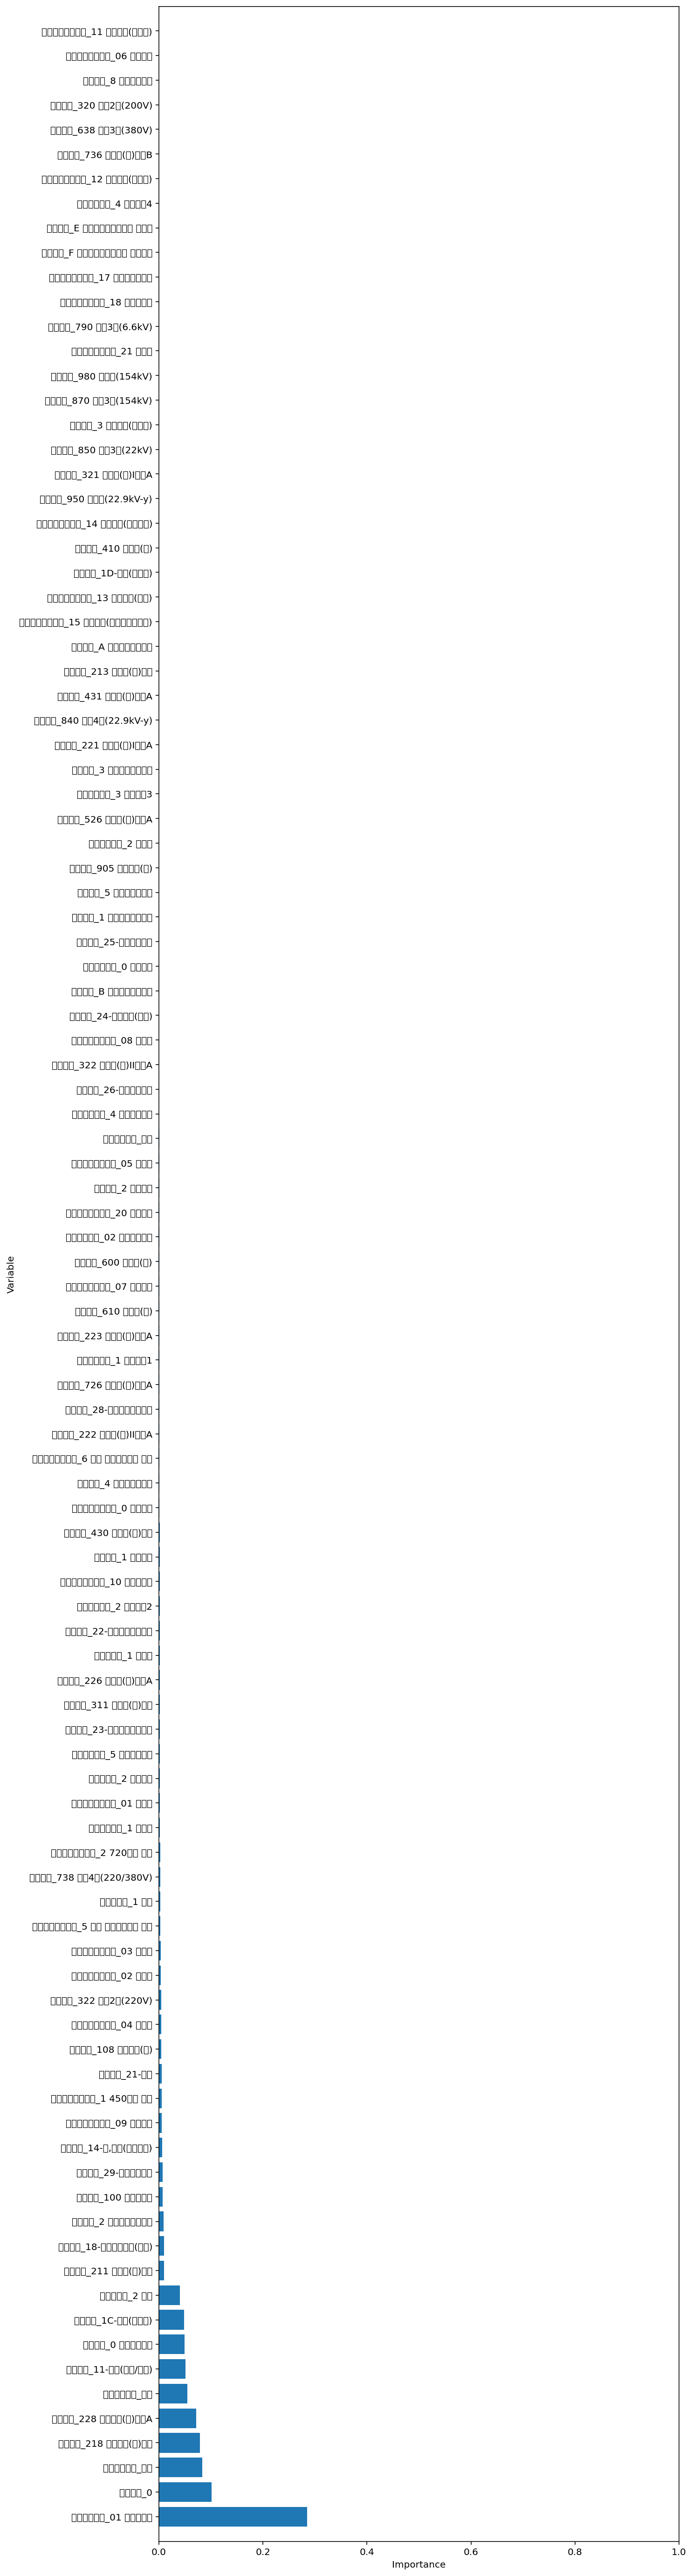

In [49]:
x = cdi.feature
y = cdi.importance
ypos = np.arange(len(x))
plt.figure(figsize=(10,50)) 
plt.barh(x, y) 
plt.yticks(ypos, x) 
plt.xlabel('Importance') 
plt.ylabel('Variable') 
plt.xlim(0, 1) 
plt.ylim(-1, len(x)) 
plt.show()

![대체 텍스트](https://)

랜덤 포레스트 분류 

In [96]:
model_rfc = RandomForestClassifier(n_estimators= 500)
model_rfc.fit(X_train, y_train)
model_rfc.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.877174333204484

In [53]:
cdr_importance = pd.DataFrame({'feature':new_x,'importance':model_rfc.feature_importances_ })

In [ ]:
cdr_importance

,feature,importance
76,공정유형코드_01 인입선공사,0.039878
13,공사형태_0,0.004161
74,가공지중구분_지중,0.013963
21,계약종별_218 임시전력(을)저압,0.066668
26,계약종별_228 임시전력(을)고압A,0.000056
...,...,...
49,저고압구분_1 저압,0.009596
63,공동이용구분_2 자수용,0.010107
57,계약방법_8 열차운행계약,0.001473
39,공급방식_320 단상2선(200V),0.009486


In [54]:
cdr_importance = cdr_importance.sort_values('importance', ascending=False) 


In [55]:
print(cdr_importance.head(20))

                                              feature  importance
76      (공, 정, 유, 형, 코, 드, _, 0, 1,  , 인, 입, 선, 공, 사)    0.095850
3       (접, 수, 종, 류, _, 1, C, -, 신, 설, (, 발, 전, 기, ))    0.071287
73                        (가, 공, 지, 중, 구, 분, _, 가, 공)    0.062998
14                  (공, 사, 형, 태, _, 1,  , 외, 선, 불, 요)    0.056586
13                                 (공, 사, 형, 태, _, 0)    0.052704
21  (계, 약, 종, 별, _, 2, 1, 8,  , 임, 시, 전, 력, (, 을, ...    0.049164
74                        (가, 공, 지, 중, 구, 분, _, 지, 중)    0.040403
19  (계, 약, 종, 별, _, 2, 1, 1,  , 일, 반, 용, (, 갑, ), ...    0.039072
0   (접, 수, 종, 류, _, 1, 1, -, 신, 설, (, 상, 용, /, 임, ...    0.037770
15                  (공, 사, 형, 태, _, 2,  , 외, 선, 소, 요)    0.034863
51            (계, 약, 방, 법, _, 0,  , 저, 압, 일, 반, 계, 약)    0.034856
77   (공, 정, 유, 형, 코, 드, _, 0, 2,  , 가, 공, 외, 선, 공, 사)    0.030407
26  (계, 약, 종, 별, _, 2, 2, 8,  , 임, 시, 전, 력, (, 을, ...    0.026826
34      (계, 약, 종, 별, _, 6, 0, 0,  , 가, 로, 등, (, 갑, ))    0.025554
17        

# 선형 모델(확률적 경사 하강법 사용)

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline

In [66]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

In [97]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8482798608426749

분류성능 비교

In [98]:
y_pred = sgd.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[4527,    6,  596],
       [ 281, 1764,  326],
       [ 181,  180, 2487]])

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      5129
           1       0.90      0.74      0.82      2371
           2       0.73      0.87      0.79      2848

    accuracy                           0.85     10348
   macro avg       0.85      0.83      0.84     10348
weighted avg       0.86      0.85      0.85     10348



동적성능평가

In [ ]:
y_score

array([[ 1.16722632, -1.21899178, -1.19307868],
       [-0.89901107, -1.37988414, -0.40391309],
       [-3.56387799,  1.20588585, -1.18379438],
       ...,
       [ 1.39895388, -1.28794565, -1.65729373],
       [-3.46732484, -1.23048409,  3.30052304],
       [-1.41074276,  1.38976283, -3.40274234]])

In [ ]:
result = pd.DataFrame(list(zip(y_score, y_pred, y_test)), 
                      columns=['score', 'predict', 'real'])
result['correct'] = (result.predict == result.real)
result

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

ValueError: ignored

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

ValueError: ignored

Support Vector Classifier (SVC)

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test,y_test)

In [ ]:
df = pd.DataFrame({''})

In [ ]:
y.head()